# Depth-Anything-V2 Model

## Loading model and it's packages

In [ ]:
!git clone https://huggingface.co/spaces/depth-anything/Depth-Anything-V2
%cd Depth-Anything-V2
!pip install -r requirements.txt

fatal: destination path 'Depth-Anything-V2' already exists and is not an empty directory.
/content/Depth-Anything-V2


In [ ]:
!wget -P /content https://huggingface.co/depth-anything/Depth-Anything-V2-Large/resolve/main/depth_anything_v2_vitl.pth?download=true
!mv "/content/depth_anything_v2_vitl.pth?download=true" "/content/depth_anything_v2_vitl.pth"

--2024-11-14 17:55:23--  https://huggingface.co/depth-anything/Depth-Anything-V2-Large/resolve/main/depth_anything_v2_vitl.pth?download=true
Resolving huggingface.co (huggingface.co)... 18.244.202.118, 18.244.202.73, 18.244.202.60, ...
Connecting to huggingface.co (huggingface.co)|18.244.202.118|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/ef/a0/efa040f8dfeabb0d7e03dde47070ea9d72db9ffe066eb5d6a44a7a2803a1477c/a7ea19fa0ed99244e67b624c72b8580b7e9553043245905be58796a608eb9345?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27depth_anything_v2_vitl.pth%3B+filename%3D%22depth_anything_v2_vitl.pth%22%3B&Expires=1731864068&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczMTg2NDA2OH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zL2VmL2EwL2VmYTA0MGY4ZGZlYWJiMGQ3ZTAzZGRlNDcwNzBlYTlkNzJkYjlmZmUwNjZlYjVkNmE0NGE3YTI4MDNhMTQ3N2MvYTdlYTE5ZmEwZWQ5OTI0NGU2N2I2MjRjNz

## Depth image prediction

In [ ]:
import cv2
import torch
import numpy as np
from google.colab.patches import cv2_imshow
from depth_anything_v2.dpt import DepthAnythingV2

In [ ]:
model = DepthAnythingV2(encoder='vitl', features=256, out_channels=[256, 512, 1024, 1024])
model.load_state_dict(torch.load('/content/depth_anything_v2_vitl.pth', map_location='cpu'))
model.eval()

raw_img = cv2.imread('/content/OIP (3).jpeg')
depth = model.infer_image(raw_img) # HxW raw depth map

<ipython-input-4-1abf94ab366f>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/depth_anything_v2_vitl.pth', map_location='cpu'))


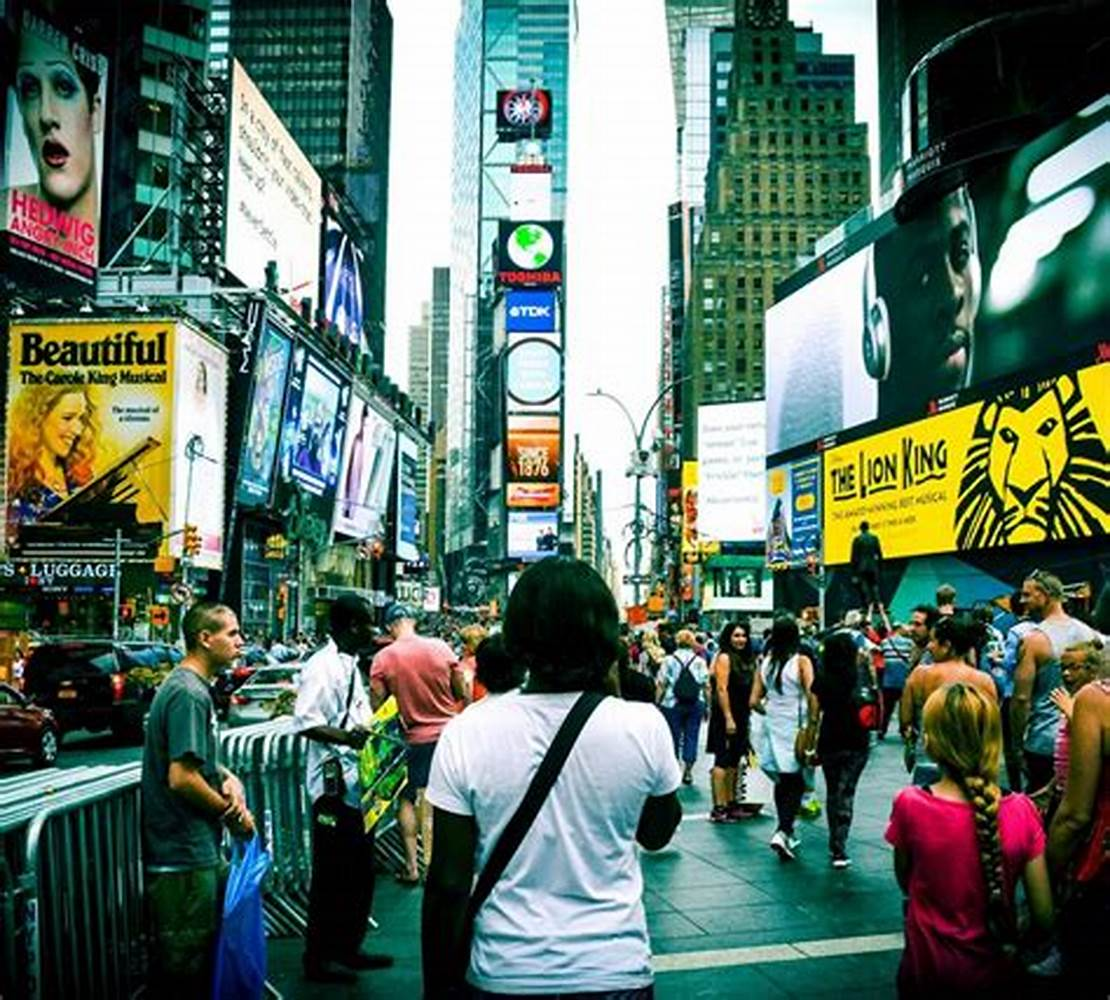

In [ ]:
cv2_imshow(raw_img)

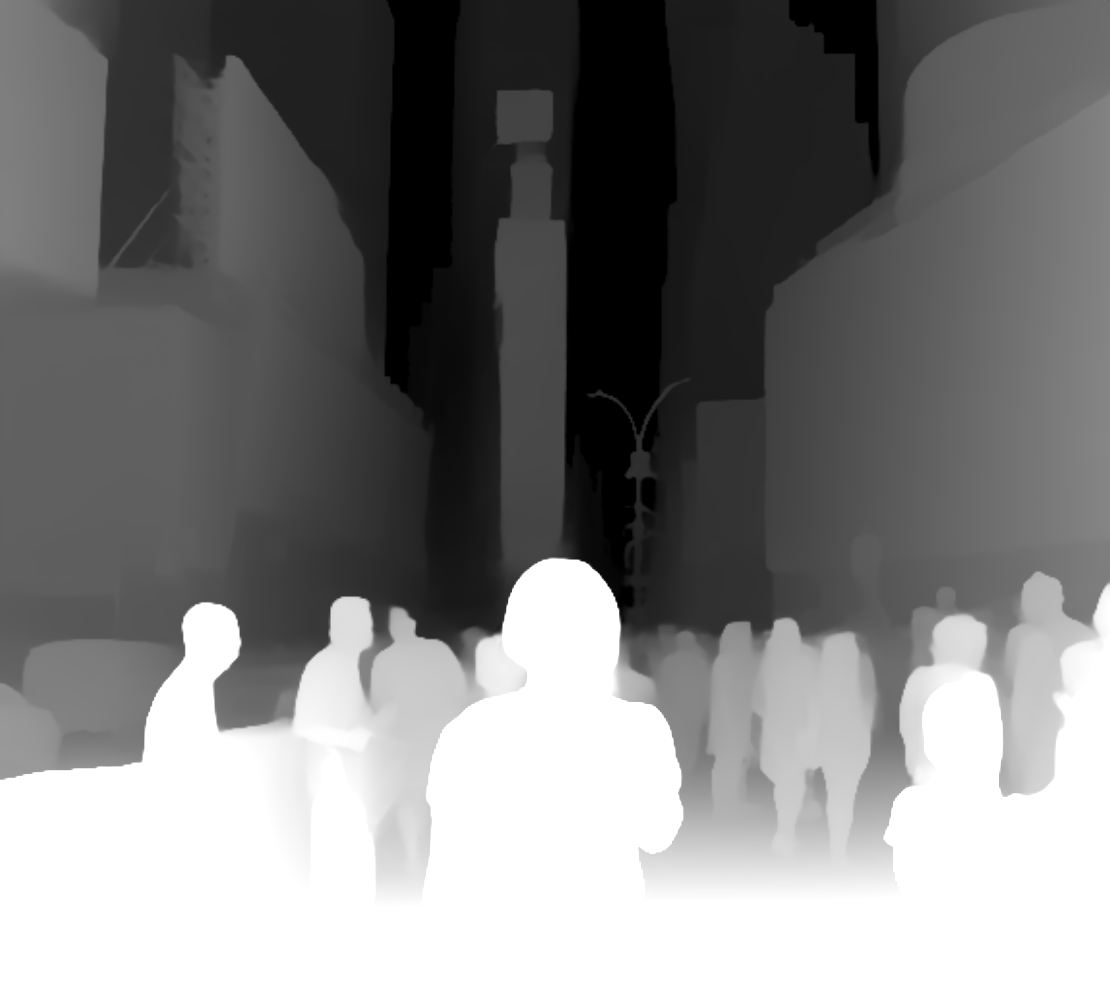

In [ ]:
cv2_imshow(depth)

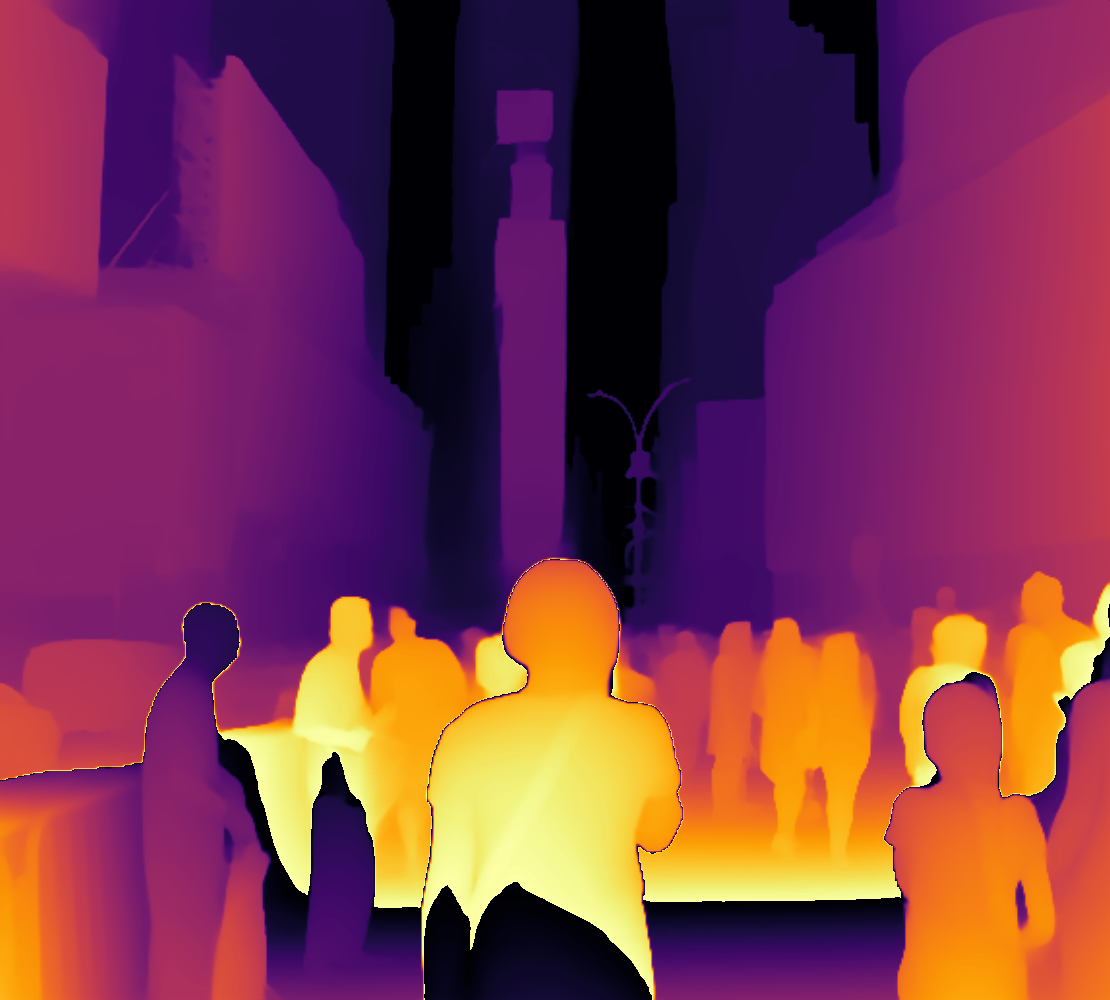

In [ ]:
depth_uint8 = depth.astype(np.uint8)
depth_color = cv2.applyColorMap(depth_uint8, cv2.COLORMAP_INFERNO)
cv2_imshow(depth_color)

## Model metrics

In [ ]:
import os
import h5py
import requests

### Dataset for testing

In [ ]:
url = 'http://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/nyu_depth_v2_labeled.mat'
response = requests.get(url)
# Define the target directory
target_directory = '/content'
# Ensure the directory exists
os.makedirs(target_directory, exist_ok=True)
# Save file in the directory
with open(os.path.join(target_directory, 'dataset_filename'), 'wb') as f:
    f.write(response.content)

In [ ]:
img_data = []
# Load the MAT file using h5py
with h5py.File('/content/dataset_filename', 'r') as f:
    # Access a specific dataset by key
    data_i = f['images'][:]
    for i in range(len(data_i)):
      img = data_i[i]  # Replace 'index' with the desired index
      print(img.shape)
      if img.shape[0] == 3:  # Shape is (3, height, width)
        img = np.transpose(img, (2, 1, 0))  # Convert to (height, width, 3)
      img_data.append(img)

(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 640, 480)
(3, 64

In [ ]:
depth_data = []
# Load the MAT file using h5py
with h5py.File('/content/dataset_filename', 'r') as f:
    # Access a specific dataset by key
    data_d = f['depths'][:]
    for i in range(len(data_d)):
      depth = data_d[i]  # Replace 'index' with the desired index
      print(depth.shape)
      if len(depth.shape) == 2:  # Shape is (height, width)
        # Transpose to (width, height)
        depth = np.transpose(depth, (1, 0))
        depth = cv2.normalize(data_d[0], None, 0, 255, cv2.NORM_MINMAX)
        depth = depth.astype(np.uint8)
        depth = cv2.bitwise_not(depth)
      depth_data.append(depth)

(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)

In [ ]:
print(len(img_data))
h_length = int(len(img_data)/3)
print(h_length)

1449
483


In [ ]:
pred_depth = []
for i in range(h_length):
  with torch.no_grad():
    pred = model.infer_image(img_data[i])
  print(pred.shape)
  pred_depth.append(pred)

(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)

### Metric 1

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, jaccard_score

In [ ]:
def binary_threshold_map(depth_map, threshold):
    """Convert depth map to binary map based on a threshold."""
    return (depth_map > threshold).astype(int)

In [ ]:
def compute_binary_metrics(pred_bin, gt_bin):
    # Flatten the 2D arrays
    gt_flat = gt_bin.ravel()
    pred_flat = pred_bin.ravel()

    # Ensure both labels (0 and 1) are represented in the confusion matrix
    tn, fp, fn, tp = confusion_matrix(gt_flat, pred_flat, labels=[0, 1]).ravel()

    # Calculate metrics
    accuracy = accuracy_score(gt_flat, pred_flat)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    iou = tp / (tp + fp + fn) if (tp + fp + fn) > 0 else 0

    return accuracy, sensitivity, specificity, iou

In [ ]:
accuracy_list, sensitivity_list, specificity_list, iou_list = [], [], [], []

for i in range(h_length):

    # Resize ground truth depth to match the shape of predicted depth
    gt_depth = cv2.resize(depth_data[i], (pred_depth[i].shape[1], pred_depth[i].shape[0]))

    # Convert to binary maps
    pred_bin = binary_threshold_map(pred_depth[i], 0.9)
    gt_bin = binary_threshold_map(gt_depth, 0.9)

    # Calculate metrics
    accuracy, sensitivity, specificity, iou = compute_binary_metrics(pred_bin, gt_bin)
    accuracy_list.append(accuracy)
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    iou_list.append(iou)

In [ ]:
# Average metrics
avg_accuracy = np.mean(accuracy_list)
avg_sensitivity = np.mean(sensitivity_list)
avg_specificity = np.mean(specificity_list)
avg_iou = np.mean(iou_list)

In [ ]:
print(f"Accuracy: {avg_accuracy:.4f}")
print(f"Sensitivity: {avg_sensitivity:.4f}")
print(f"Specificity: {avg_specificity:.4f}")
print(f"IoU: {avg_iou:.4f}")

Accuracy: 0.9960
Sensitivity: 0.9960
Specificity: 0.0000
IoU: 0.9960


### Metric 2

In [ ]:
from sklearn.metrics import mean_absolute_error
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

In [ ]:
def evaluate_depth_map(pred_depth, gt_depth):
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(gt_depth.flatten(), pred_depth.flatten())
    # Root Mean Square Error (RMSE)
    rmse = np.sqrt(np.mean((gt_depth - pred_depth) ** 2))
    # Structural Similarity Index (SSIM)
    ssim_value = ssim(gt_depth, pred_depth, data_range=gt_depth.max() - gt_depth.min())

    return mae, rmse, ssim_value

In [ ]:
def evaluate_depth_map(pred_depth, gt_depth, tolerance=5):
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(gt_depth.flatten(), pred_depth.flatten())
    # Root Mean Square Error (RMSE)
    rmse = np.sqrt(np.mean((gt_depth - pred_depth) ** 2))
    # Structural Similarity Index (SSIM)
    ssim_value = ssim(gt_depth, pred_depth, data_range=gt_depth.max() - gt_depth.min())

    # Intersection over Union (IoU) for depth within a tolerance
    intersection = np.sum(np.abs(pred_depth - gt_depth) < tolerance)
    union = pred_depth.size  # Total number of pixels
    iou = intersection / union

    return mae, rmse, ssim_value, iou

In [ ]:
maes, rmses, ssims, ious = [], [], [], []

for i in range(h_length):

    # Resize ground truth depth to match the shape of predicted depth
    gt_depth = cv2.resize(depth_data[i], (pred_depth[i].shape[1], pred_depth[i].shape[0]))

    # Compute the evaluation metrics
    mae, rmse, ssim_value, iou = evaluate_depth_map(pred_depth[i], gt_depth)

    # Append metrics for each test image
    maes.append(mae)
    rmses.append(rmse)
    ssims.append(ssim_value)
    ious.append(iou)

In [ ]:
avg_mae = np.mean(maes)
avg_rmse = np.mean(rmses)
avg_ssim = np.mean(ssims)
avg_iou = np.mean(ious)

In [ ]:
print("Average MAE: ",avg_mae)
print("Average RMSE: ",avg_rmse)
print("Average SSIM: ",avg_ssim)
print("Average IOU: ",avg_iou)

Average MAE:  96.62021
Average RMSE:  133.28795
Average SSIM:  0.5625730223304464
Average IOU:  0.9960170268288475
